# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset = pd.read_csv('E:\\Courses\\Machine learning arabic nanodegree\\Part 2 - Regression\\Section 8 - Decision Tree Regression\\Position_Salaries.csv')

# Dataset Info

Dataset Heading

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


# Dataset Satistics_Info

In [4]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [5]:
dataset.median()

Level          5.5
Salary    130000.0
dtype: float64

In [6]:
print("Level_Skewness: %f" % dataset['Level'].skew()) 
print("Level_Kurtosis: %f" % dataset['Level'].kurt())
print(" ")
print("Salary_Skewness: %f" % dataset['Salary'].skew()) 
print("Salary_Kurtosis: %f" % dataset['Salary'].kurt())

Level_Skewness: 0.000000
Level_Kurtosis: -1.200000
 
Salary_Skewness: 2.104605
Salary_Kurtosis: 4.549063


# Graphs

C:\Users\asrar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


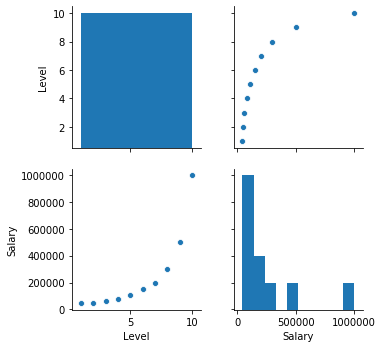

In [7]:
sns.pairplot(dataset,size=2.5)

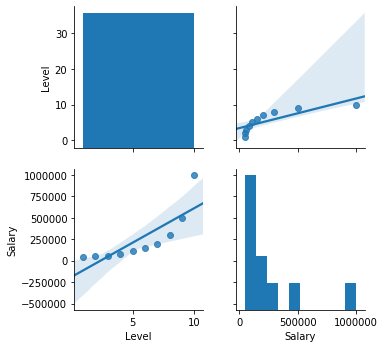

In [8]:
sns.pairplot(dataset,size=2.5,kind='reg')

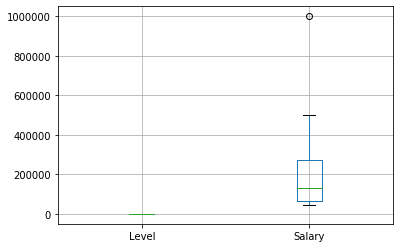

In [9]:
dataset.boxplot()

In [10]:
def Identify_Outliers(Var):
    q1, q3= np.percentile(dataset[Var],[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    outliers = [x for x in dataset[Var] if x < lower_bound or x > upper_bound]
    print('Identified outliers: %d' % len(outliers))
    print(outliers)
    
Identify_Outliers('Salary')

Identified outliers: 1
[1000000]


# Comments

- there is only one outliar in Salary is 1000000
- from graphs Linear Regression not fitting the all points

# Data Preprocessing

Handling Missing Data

In [11]:
def Missing_data():
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)
    
Missing_data()

          Total  Percent
Salary        0      0.0
Level         0      0.0
Position      0      0.0


splitting dataset into independent variables and dependent variables

In [12]:
X=dataset.iloc[:,1:2].values #should to be matrix
Y=dataset.iloc[:,2].values   # ok to be vector

Feature Scaling

Decision Tree not need feature scaling

# Model

Based on my data exploration , I choose Decision Tree Regression to build the model

In [13]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

Visualising

Visualising the Decision Tree Regression results

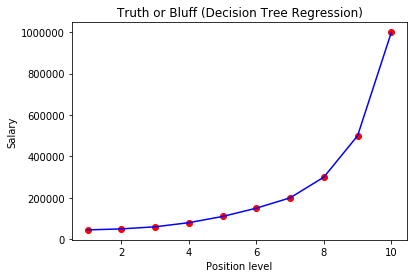

In [14]:
plt.scatter(X, Y, color = 'red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Visualising the Decision Tree Regression results (for higher resolution and smoother curve)    
we will add values between the minimum and maximum value of independent varaibles

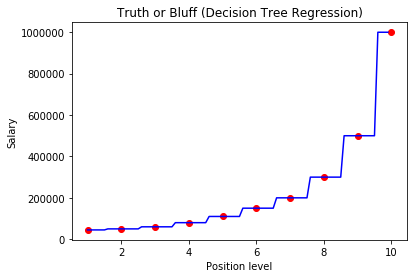

In [15]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, Y, color = 'red')
plt.plot(X_grid,regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [16]:
regressor.predict([[6.5]])

array([150000.])